# Crop Prediction 

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#importing Decision Tree from sklearn
from sklearn.tree import DecisionTreeClassifier
#importing Logistic regression 
from sklearn.linear_model import LogisticRegression
#importing Support vector machine
from sklearn.svm import SVC
#importing Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
#importing random forest
from sklearn.ensemble import RandomForestClassifier
#importing K-Nearest classifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#lets import the Dataset
df = pd.read_csv("data1.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
#overview of the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df=df.rename(columns={'label':'Crop'})
df 

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
#checking for the NAN value in the data
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [6]:
#describing data or Statistical information of the data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
#checking datatype
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
Crop            object
dtype: object

In [8]:
#uniques in label column
print(df.Crop.unique())
print("Total unique vlaues in Label columns are: ",len(df.Crop.unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Total unique vlaues in Label columns are:  22


In [9]:
#toatal counts of each unique value in label
count=df.Crop.value_counts()

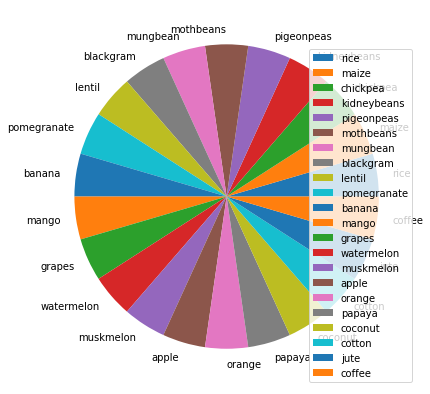

In [10]:
from matplotlib import pyplot as plt
import numpy as np
fig=plt.figure(figsize=(10,7))
plt.pie(count,labels=df.Crop.unique())
plt.legend(loc="lower right")
plt.show()

In [11]:
columns = df.columns[:-1]

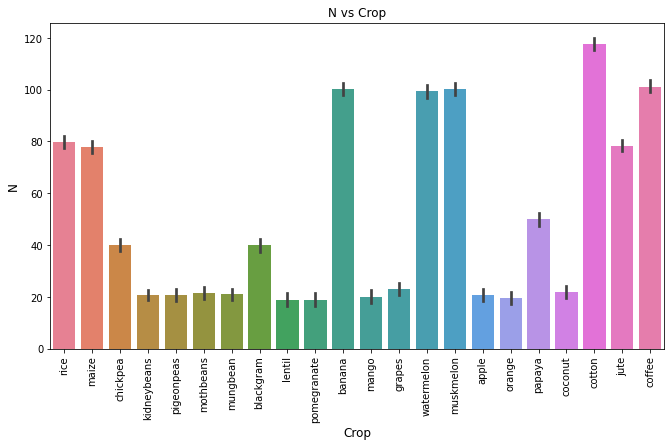

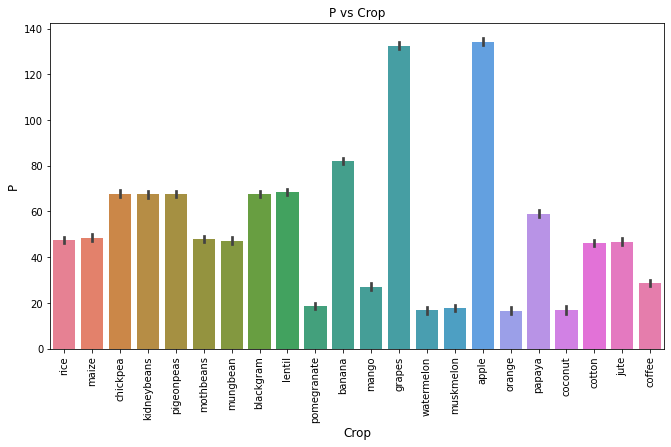

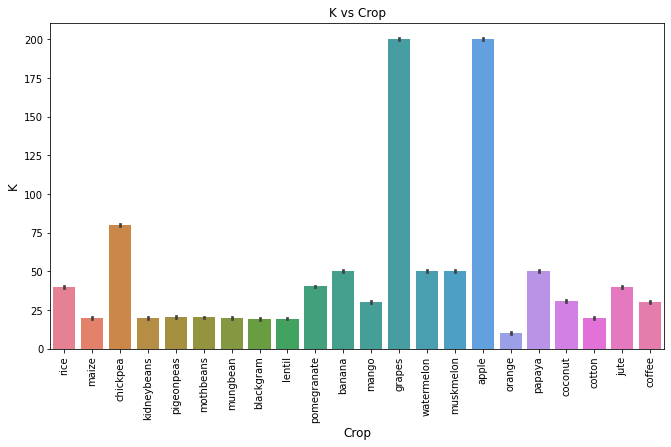

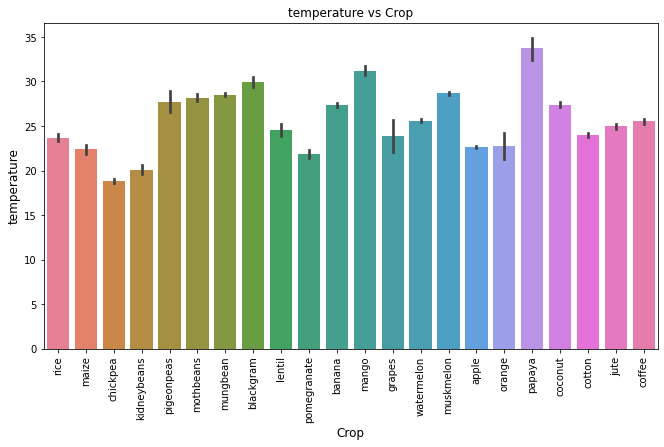

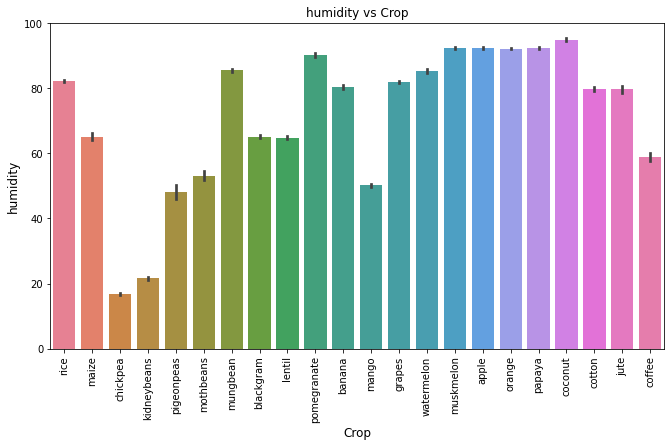

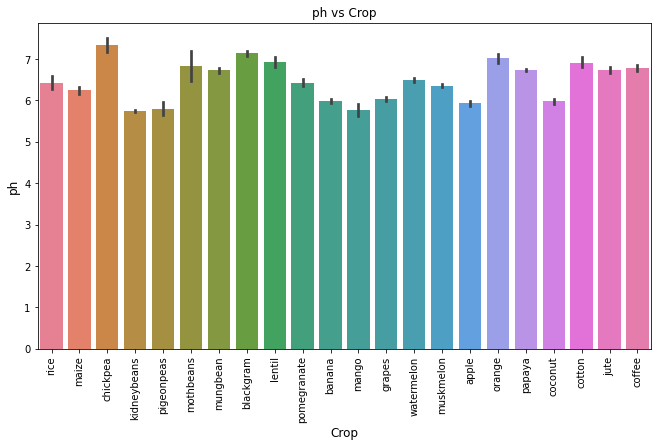

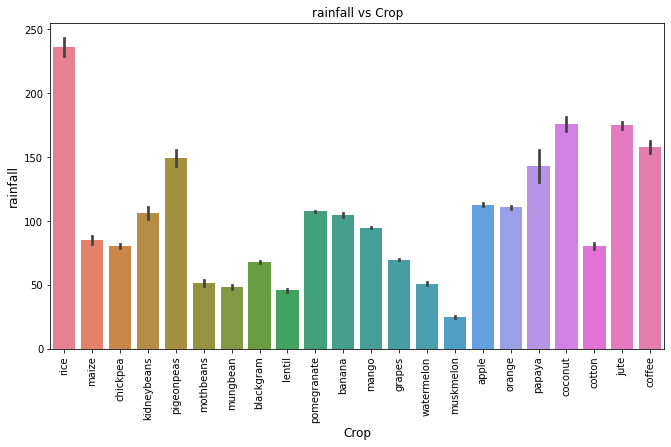

In [12]:
for column in columns:
    plt.figure(figsize = (11, 6))
    sns.barplot(x = 'Crop', y = column, data = df, palette = 'husl')
    plt.xlabel('Crop', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'{column} vs Crop')
    plt.show()

### Preprocessing and Splitting Data

In [13]:
X = df.drop(["Crop"], axis = 1)
y = pd.DataFrame(df.Crop)
print(X.shape)
print(y.shape)

(2200, 7)
(2200, 1)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in X.columns:
            x = np.array(X[col]).reshape(-1,1)
            X[col]=scaler.fit_transform(x)

In [15]:
#Splitting training data and testing data using train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=50, test_size=0.2)

In [16]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (1760, 7)
y_train:  (1760, 1)
X_test:  (440, 7)
y_test:  (440, 1)


# Support Vector Machine

In [17]:
from sklearn.svm import SVC
from sklearn import metrics
cls=SVC(kernel="linear")
cls.fit(X_train,y_train)

y_pred=cls.predict(X_test)

print("accuracy: ",metrics.accuracy_score(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
print(metrics.classification_report(y_test, y_pred))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:  0.9840909090909091
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  0  0  0  0  0  0]
 [ 0

# K Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
# accuracy on X_test
knn_predictions = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test,knn_predictions)
print (accuracy)
 
cm = metrics.confusion_matrix(y_test, knn_predictions)
print(cm)
print(metrics.classification_report(y_test, knn_predictions))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9704545454545455
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

# Decision Tree

In [19]:
#applying DT for Train data
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train, y_train)
#Checking Score of the model
score_dt=model_dt.score(X_test, y_test)
print("Accuracy for Decision Tree: ",score_dt)
#model prediction
y_pred_dt = model_dt.predict(X_test)
# generating report for classification result
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

Accuracy for Decision Tree:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        14
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        25
        jute       0.96      0.86      0.91        29
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        13
      orange       1.00      1.00

### Gaussian NB

In [20]:
#applying Gaussian NB for Training data
nb = GaussianNB()
model_nb = nb.fit(X_train, y_train)
#Checking Score of the model
score_nb=model_nb.score(X_test, y_test)
print("Accuracy for Lofistic regression: ",score_nb)
#model prediction
y_pred_nb = model_nb.predict(X_test)
# generating report for classification result
print(metrics.classification_report(y_test, y_pred_nb))

Accuracy for Lofistic regression:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        14
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        25
        jute       0.88      1.00      0.94        29
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        13
      orange       1.00     

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### RandomForest

In [21]:
#applying KNeighbors for Training data
rf = RandomForestClassifier(n_estimators=100, criterion = 'entropy')
model_rf = rf.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8240\394519184.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = rf.fit(X_train, y_train)


In [22]:
#Checking Score of the model
score_rf=model_rf.score(X_test, y_test)
print("Accuracy for Lofistic regression: ",score_rf)

Accuracy for Lofistic regression:  0.9977272727272727


In [23]:
#model prediction
y_pred_rf = model_rf.predict(X_test)

In [24]:
# generating report for classification result
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        14
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        25
        jute       0.97      1.00      0.98        29
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        13
      orange       1.00      1.00      1.00        18
      papaya       1.00    